<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/Bagging_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

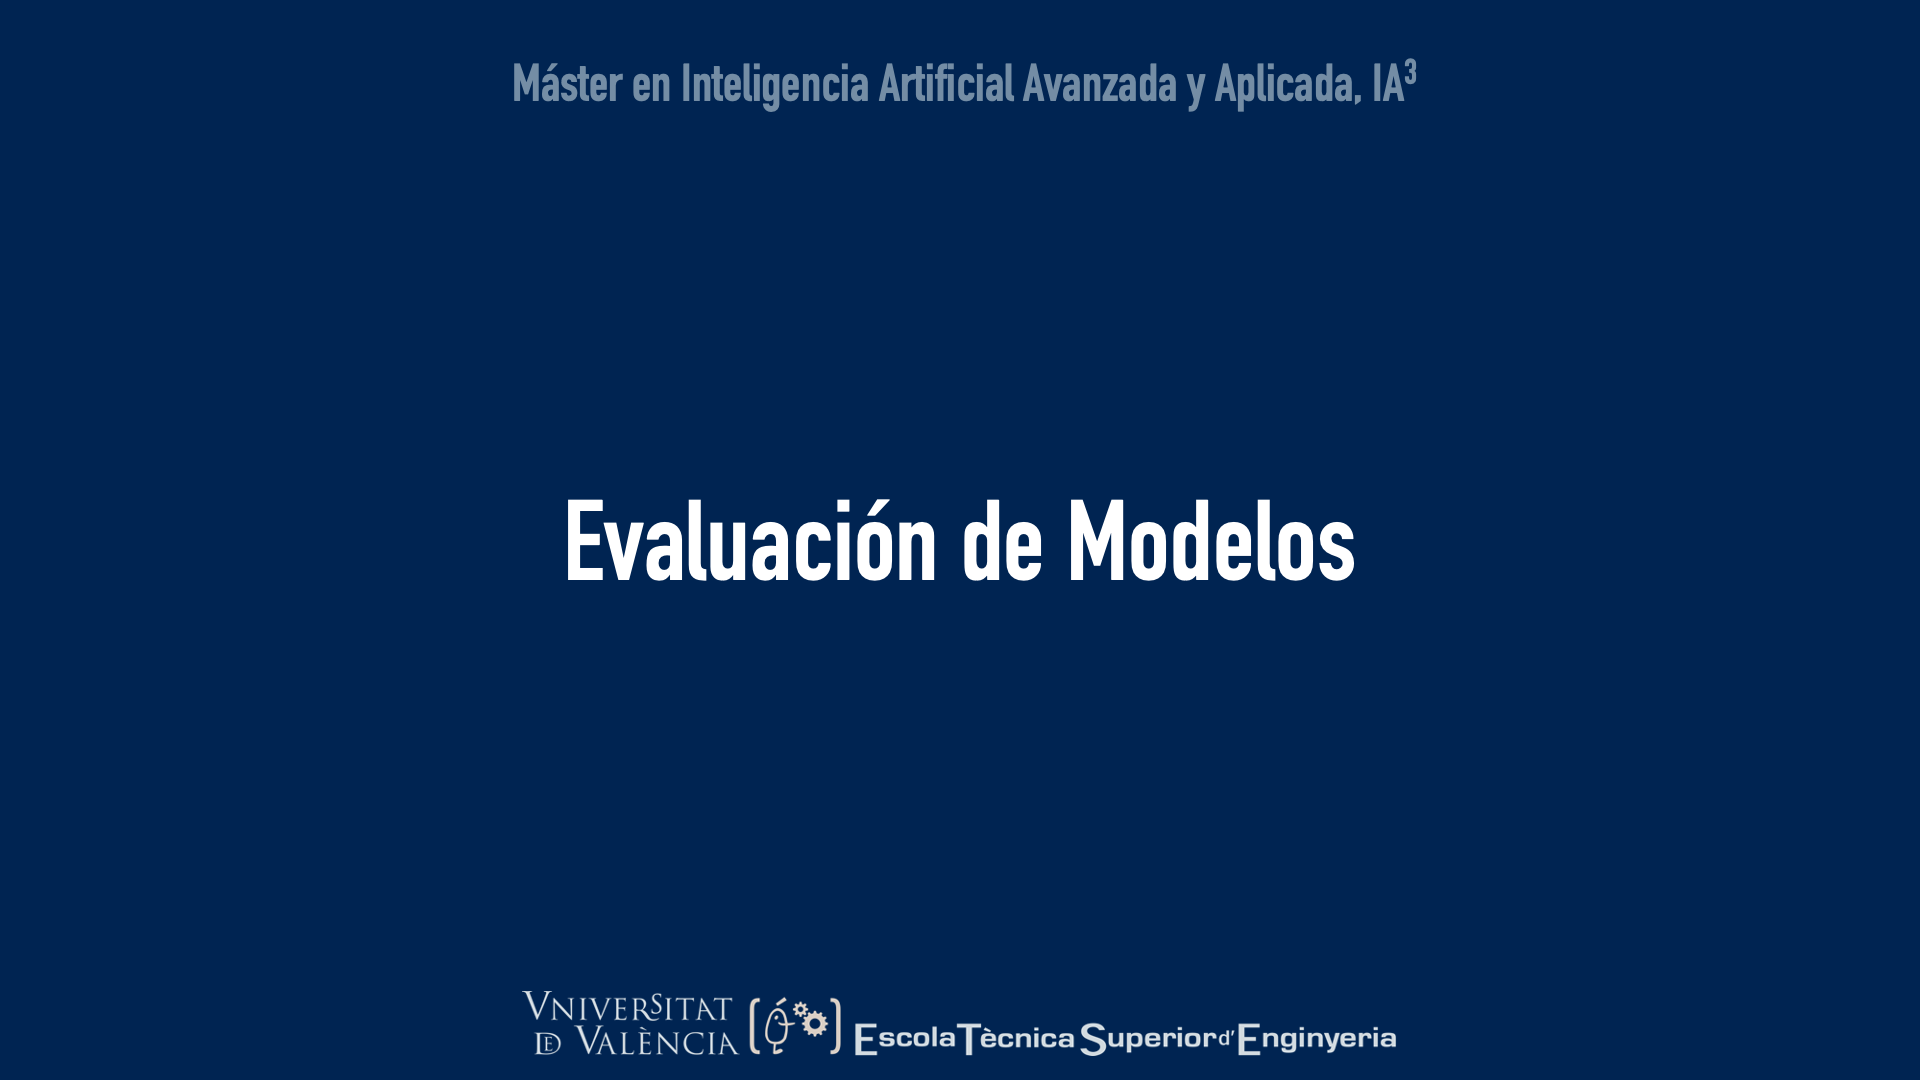

Antes de comenzar a estudiar los modelos de bagging. Repasemos las diferentes métricas de evaluación que podemos utilizar para medir el rendimiento de nuestro modelo. Es importante matizar, que estas métricas están construídas para evaluar los resultados en función de las características de nuestro dataset.


Algunas de las métricas disponibles son:

- Accuracy: Esta métrica mide el número total de aciertos sobre el total de casos. En general suele ser la métrica por defecto en la mayoría de paquetes. Es una métrica poco precisa si existe desbalanceo de clases (las ocurrencias de una clase son mucho más frecuentes frente a otra).

$$\frac{tp+tn}{tp+fn+tn+fp}$$

- Precision: Esta métrica mide el total de casos positivos frente al total de casos positivos resultados de la predicción del algoritmo. Esta métrica arroja una visión sobre la proporción de aciertos en nuestra predicción. Toma especial importancia si la ocurrencia de un positivo acarrea un gasto, por ejemplo, si esto produce una orden de trabajo en una fábrica.

$$\frac{tp}{tp+fp}$$

- Recall: Mide el total de casos positivos correctamente clasisificados frente al total de casos positivos de una determinada clase. Es una métrica especialmente útil cuando la clasificación de uno de los eventos es importante para el éxito del algoritmo, por ejemplo, en medicina.

$$\frac{tp}{tp+fn}$$

- F1-Score: Es la media entre precision y recall y toma en cuenta ambos parámetros. Esta métrica puede adaptarse a problemas de clases imbalanceados al tener en cuenta la proporción de la clase que se está tratando.

$$\frac{tp}{tp+0.5*(fn+fp)}$$


# Ejercicio

Construye un modelo cualquiera de clasificación para el dataset pinguins. Consulta la documentación de sklearn y calcula todas las métricas descritas anteriormente.

https://scikit-learn.org/stable/modules/model_evaluation.html

Concluye que métrica se adapta mejor al problema que tratamos de resolver.

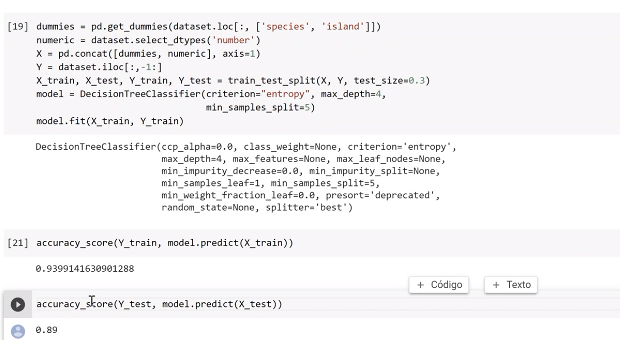

In [14]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from math import log

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
dataset = sns.load_dataset("penguins")

In [95]:
dts=dataset.dropna() #incplace = true si que guarde en var creo

#X = dts.iloc[:, :-1]
#y = dts.iloc[:, -1:]


dummies = pd.get_dummies(dataset.loc[:, ['species', 'island']])
numeric = dataset.select_dtypes('number')
X = pd.concat([dummies, numeric], axis=1)
Y = dataset.iloc[:,-1:]

#X_2=pd.get_dummies(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
model = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=5) #definir modelo
model.fit(X_train, Y_train) #entrene modelo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [96]:
model.classes_

array(['Female', 'Male'], dtype=object)

In [97]:
from  sklearn.metrics import accuracy_score
accuracy_score(Y_test, model.predict(X_test))

0.88

In [99]:
accuracy_score(Y_train, model.predict(X_train))

0.9484978540772532

In [100]:
model.predict(X_test)

array(['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male'],
     

In [101]:
precision_score(y_test_bool,y_pred_test_bool)

0.868421052631579

In [35]:
#el modelo no funciona igual para todo nuestro espacio de etiquetas
#en este caso no funciona igual para female que male
#por ejemplo, puedo ser por tener mas muestras female que male o por 
#como esta constuido el modelo, como estan puestas  las características

In [25]:
y_train_bool = pd.get_dummies(Y_train)["sex_Female"]
y_pred_train_bool = pd.get_dummies(pd.DataFrame(model.predict(X_train)))["0_Female"]
y_test_bool = pd.get_dummies(Y_test)["sex_Female"]
y_pred_test_bool = pd.get_dummies(pd.DataFrame(model.predict(X_test)))["0_Female"]

In [103]:
y_train_bool = pd.get_dummies(Y_train)["sex_Female"]
y_pred_train = model.predict(X_train)
y_pred_train_df = pd.DataFrame(y_pred_train)
y_pred_train_bool = pd.get_dummies(y_pred_train_df)["0_Male"]
y_test_bool = pd.get_dummies(Y_test)["sex_Male"]
y_pred_test_bool = pd.get_dummies(pd.DataFrame(model.predict(X_test)))["0_Male"]

In [104]:
y_train_bool

288    1
162    1
271    0
193    1
126    1
      ..
30     1
51     0
307    0
298    1
90     1
Name: sex_Female, Length: 233, dtype: uint8

In [26]:
from  sklearn.metrics import precision_score
precision_score(y_train_bool, y_pred_train_bool, labels=["Female", "Male"])

1.0

In [28]:
precision_score(Y_test,model.predict(X_test), pos_label='Female')

0.8695652173913043

In [34]:
precision_score(Y_test,model.predict(X_test), pos_label='Female')

NameError: ignored

In [29]:
#escojo cuales son los positivos, en este caso Male
y_train_bool = pd.get_dummies(Y_train)["sex_Male"]
y_pred_train_bool = pd.get_dummies(pd.DataFrame(model.predict(X_train)))["0_Male"]
y_test_bool = pd.get_dummies(Y_test)["sex_Male"]
y_pred_test_bool = pd.get_dummies(pd.DataFrame(model.predict(X_test)))["0_Male"]

In [31]:
recall_score(Y_test, model.predict(X_test), pos_label='Male')

0.8461538461538461

In [33]:
from  sklearn.metrics import f1_score
f1_score(Y_test,model.predict(X_test),average=None, labels=['Female','Male'])

array([0.87912088, 0.85714286])

In [27]:
#### NO VA
#from  sklearn.metrics import precision_score
#precision_score(Y_test, model.predict(X_test))

In [40]:
model.predict_proba(X_test)

array([[0.47562485, 0.52437515],
       [0.4804753 , 0.5195247 ],
       [0.46870201, 0.53129799],
       [0.47192855, 0.52807145],
       [0.46822707, 0.53177293],
       [0.4800769 , 0.5199231 ],
       [0.47061677, 0.52938323],
       [0.46743351, 0.53256649],
       [0.48040916, 0.51959084],
       [0.4776793 , 0.5223207 ],
       [0.47342798, 0.52657202],
       [0.4735528 , 0.5264472 ],
       [0.47099286, 0.52900714],
       [0.4818775 , 0.5181225 ],
       [0.46514372, 0.53485628],
       [0.46658864, 0.53341136],
       [0.47724314, 0.52275686],
       [0.47813158, 0.52186842],
       [0.46498223, 0.53501777],
       [0.46826297, 0.53173703],
       [0.47138434, 0.52861566],
       [0.47541622, 0.52458378],
       [0.4627651 , 0.5372349 ],
       [0.47945139, 0.52054861],
       [0.47733837, 0.52266163],
       [0.47317395, 0.52682605],
       [0.46636088, 0.53363912],
       [0.47212243, 0.52787757],
       [0.46923855, 0.53076145],
       [0.47865707, 0.52134293],
       [0.

Otra métrica especialmente importante es el área bajo la curva roc. La curva roc mide la progresión de verdaderos positivos conforme aumenta el número de falsos positivos. De esta manera se representa como reacciona el modelo conforme el umbral de clasificación se va haciendo más laxo. Esta curva siempre comienza en el punto (0,0) y acaba en el (1,1) y lo ideal es conseguir alcanzar el máximo de true positives en un punto temprano de la curva.

In [36]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.express as px

In [37]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, y)
model = DecisionTreeClassifier(criterion="entropy", max_depth=0.2, min_samples_split=0.2) #definir modelo
model.fit(X_train, Y_train) #entrene modelo


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=0.2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
#model = LogisticRegression(max_iter=2)
#model.fit(X_train, Y_train['sex'])




In [78]:
model.score(X_test, Y_test)

0.4642857142857143

In [79]:
model.classes_

array(['Female', 'Male'], dtype=object)

In [80]:
#Transform into probabilities 
new_probs = []
for value in Y_test['sex']:
  if value == "Male": #Male 
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)

In [81]:
#otra forma conv datos en probabilidades es con el get dummies
new_probs = pd.get_dummies(Y_test)["sex_Female"]
new_probs

67     0
155    1
294    1
145    0
129    0
      ..
244    1
120    1
333    0
204    1
44     1
Name: sex_Female, Length: 84, dtype: uint8

In [82]:
fpr, tpr, thresholds = roc_curve(new_probs, list(model.predict_proba(X_test)[:,1]), drop_intermediate=False)
#drop intermediet, true, elimina puntos intermedios, si es false curva más larga
#lo que hace es iterar empieza a bajar el theshold
#aumentan lo valores, poqueto a poco van variando y aumentando tpr y fpr
#hay un punto en el que llega al 1 y ya se estabiliza en 1,1 y ya no nos aporta nada
#se calcula el area bajo la curva como una métrica, si área grande crece más rápido
#si área pequeña, crece menos rápido.
# a partir de área de 0.75 empieza a ser bueno
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})

In [83]:
df_roc

,fpr,tpr,threshold
0,0.0,0.0,1.518072
1,1.0,1.0,0.518072


In [84]:
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show() #curva ROC true positives respecto a false positive. 
#en el prumer escalor tenemos un 26% de verd positivos prente a falsos
#thereshold, el modelo es un 53% seguro para entrar en el caso, cuando me voy al array model_predict, quito los que son menore a esto
#conforme reduzcon el umbreal de decision aumenta 
#cuandto antes aumenta el tpf y fp 

In [ ]:
#Transform into probabilities 
new_probs = []
for value in Y_test:
  if value == "Female": #Male 
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)

# Ejercicio

Tunead el modelo anterior y observar los cambios sobre la curva roc conforme el modelo se hace más robusto.

Sin embargo a veces, interesará disponer de un único valor para medir el rendimiento del modelo. En ese caso, es posible calcular el área sobre la curva roc (roc_auc). El área bajo la curva es un buen indicativo de como mejora el crecimiento de los tp frente a los fp.

In [52]:
roc_auc_score(new_probs, list(model.predict_proba(X_test)[:,1])) #area bajo la curva roc
#si el área es mayor es que la curva crece rápido

0.27580579355365153

In [49]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
dataframe = pd.read_csv(url, header=None)

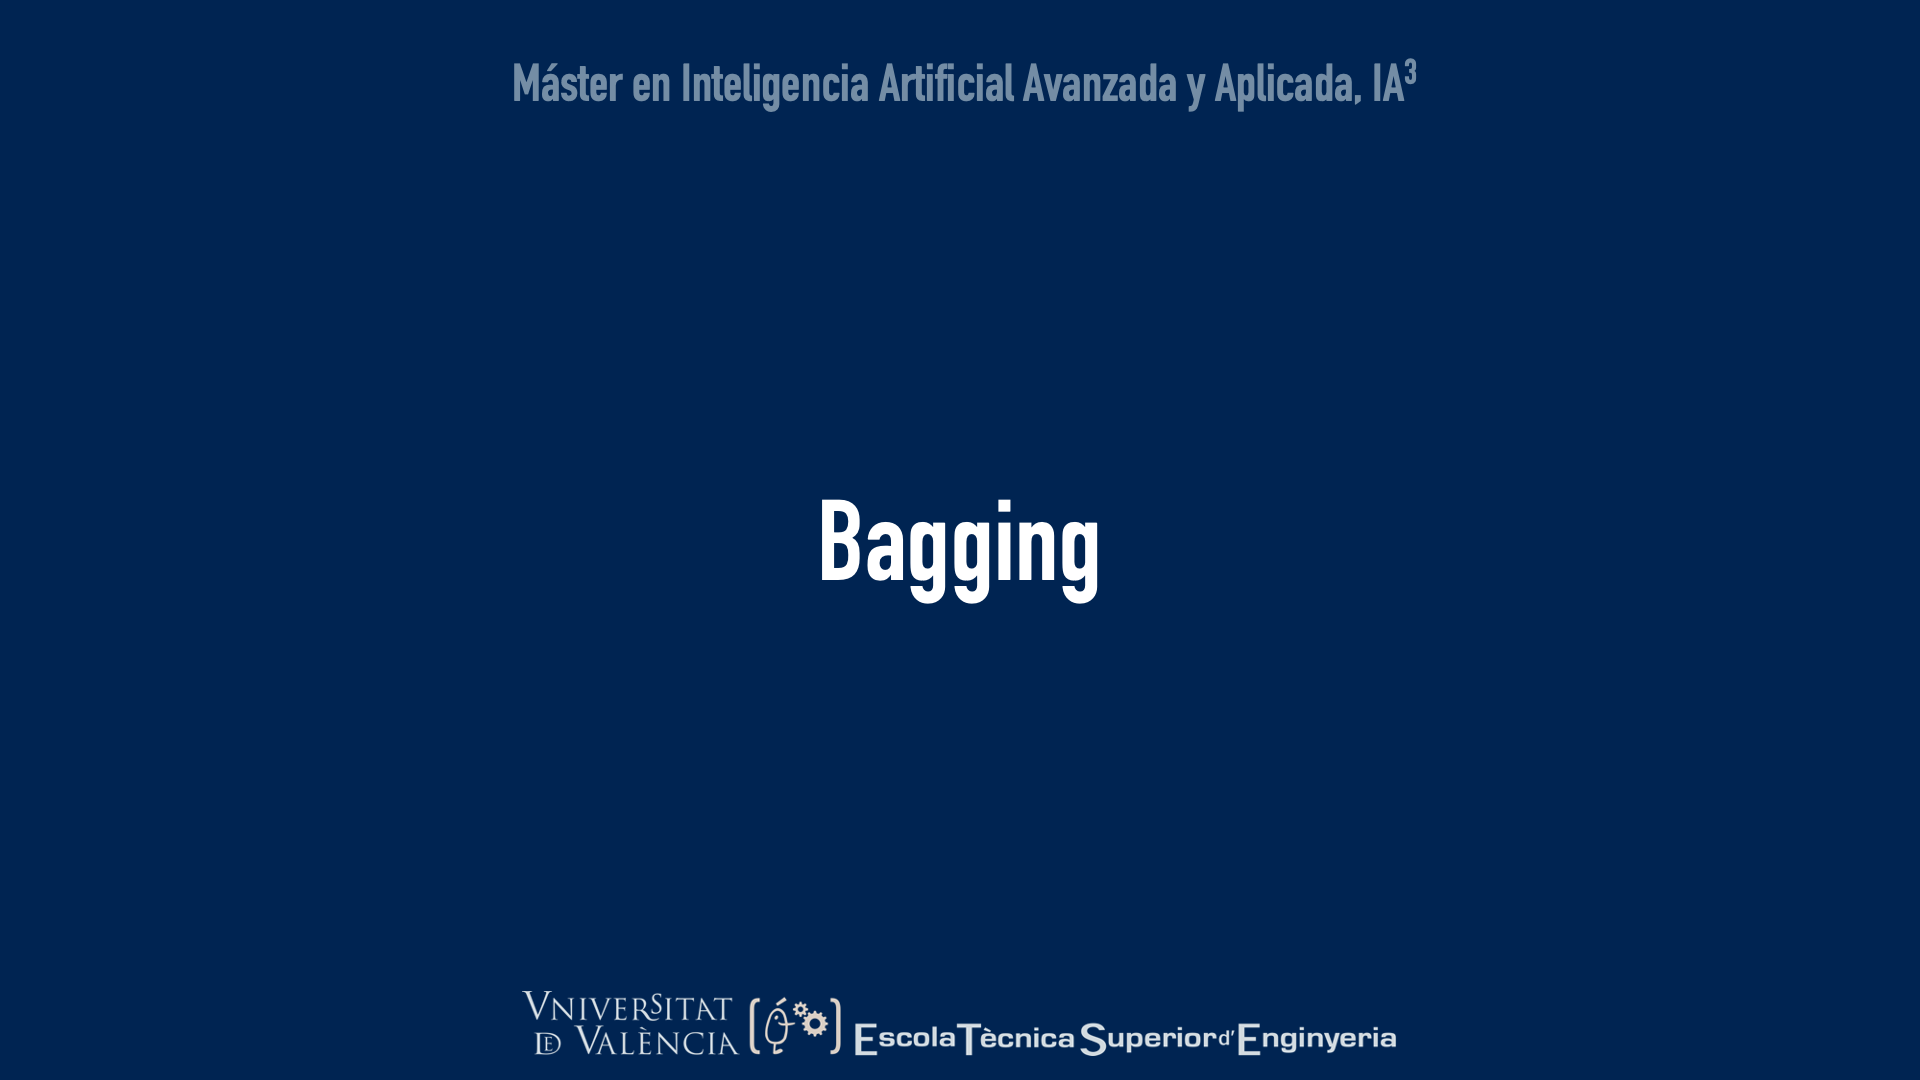

Los algoritmos de bagging pertenecen a la familia de los ensemble methods. La idea tras estos algoritmos es construir una serie de clasificadores (o regresores) débiles (weak classifiers) que de forma singular tienen poco poder predictivo pero en conjunto son capaces de alcanzar rendimientos excelentes.

La predicción en los modelos de bagging se calcula como la media de las predicciones para el caso de la regresión o como el voto de la mayoría para la clasificación.

Vamos a preparar un bagging classifier basado en algoritmos LogisticRegression.

Para preparar este algoritmo necesitaremos definir:

- base_estimator: El estimador base que se entrenará con diferentes subconjuntos de datos y que se utilizará para calcular la predicción final.
- n_estimators: Número de estimadores que se entrenará.
- max_samples: Número máximo de muestras que se utilizará para entrenar cada estimador.
- max_features: Número máximo de características a las que podrá acceder cada estimador.

Como podéis observar, los weak classifiers no tendrán acceso a toda la información, esto permitirá añadir cierta aleatoriedad a cada entrenamiento, de esta manera los clasificadores realizarán predicciones distintas.

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
import numpy as np

In [109]:
np.random.seed(123) #para generar num aleatorior controlando la aleatoriedad

In [125]:
dataset = sns.load_dataset("penguins")
dataset.dropna(inplace=True)
X = pd.get_dummies(dataset.iloc[:,:-1])
Y = dataset['sex']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [173]:
#base_estimator = LogisticRegression(max_iter=300) 
#el modelo de arriba seria un bachmark, puntos de partida, más facil
base_estimator = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=10)
model = BaggingClassifier(base_estimator, n_estimators=500, max_samples=100, max_features=7) #tunear buggin 500, 100 

In [174]:
model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=10,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,

In [175]:
model.score(X_test, Y_test)

0.9047619047619048

In [176]:
base_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [177]:
base_estimator.score(X_test, Y_test)

0.8690476190476191

Como podéis observar un clasificador bagging mal definido no tiene porque mejorar en rendimiento a un único clasificador.

# Ejercicio:

Intentad mejorar el resultado del clasificador base tuneando los hiperparámetros del clasificador bagging. Dibujad la curva roc y calculad el auc de vuestra elección final.

In [222]:
# Write your code here
model.predict_proba(X_test)

array([[0.325, 0.675],
       [0.12 , 0.88 ],
       [0.54 , 0.46 ],
       [0.5  , 0.5  ],
       [1.   , 0.   ],
       [0.99 , 0.01 ],
       [0.93 , 0.07 ],
       [0.215, 0.785],
       [0.965, 0.035],
       [0.425, 0.575],
       [0.065, 0.935],
       [0.01 , 0.99 ],
       [0.115, 0.885],
       [0.115, 0.885],
       [0.675, 0.325],
       [0.99 , 0.01 ],
       [0.975, 0.025],
       [0.995, 0.005],
       [0.005, 0.995],
       [0.52 , 0.48 ],
       [0.45 , 0.55 ],
       [0.97 , 0.03 ],
       [0.01 , 0.99 ],
       [0.025, 0.975],
       [0.275, 0.725],
       [0.015, 0.985],
       [0.465, 0.535],
       [0.87 , 0.13 ],
       [0.85 , 0.15 ],
       [0.005, 0.995],
       [0.625, 0.375],
       [0.03 , 0.97 ],
       [0.365, 0.635],
       [0.975, 0.025],
       [0.025, 0.975],
       [0.125, 0.875],
       [0.065, 0.935],
       [0.08 , 0.92 ],
       [0.485, 0.515],
       [0.96 , 0.04 ],
       [1.   , 0.   ],
       [0.53 , 0.47 ],
       [0.185, 0.815],
       [0.0

El algoritmo RandomForest es un caso particular de clasificador bagging que ha ganado en popularidad dado sus buenos resultados en multitud de problemas.

En este caso el clasificador elegido como base se trata de un árbol de decisión. Dado el criterio egoísta del árbol de decisión, de nuevo tan solo podrán acceder a un subconjuntos de características para realizar la clasificación. En este caso el máximo número de características se define como:

$$ \sqrt{nfeatures} $$

La raíz cuadrada del número de características fue propuesta en el paper original como el número idóneo de features a mostrar a cada base estimator.

Los hiperparámetros que podéis definir en este modelo son los mismos que un árbol de decisión y afectarán a cada weak classifier entrenado.


# Ejercicio

Entrenad un RandomForestClassifier y de nuevo evaluad los resultados frente a un árbol de decisión propiamente tuneado.

In [219]:
# Code here
model = RandomForestClassifier(n_estimators=200, max_depth=20)
#min_samples_split=4, max_samples estos mejor no tocar 

In [220]:
model.fit(X_train, Y_train) #entenamientiento del modelo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [221]:
model.score(X_test, Y_test) #evaluamos
#max_depth = 20 --> 0.9166666666666666

0.9166666666666666

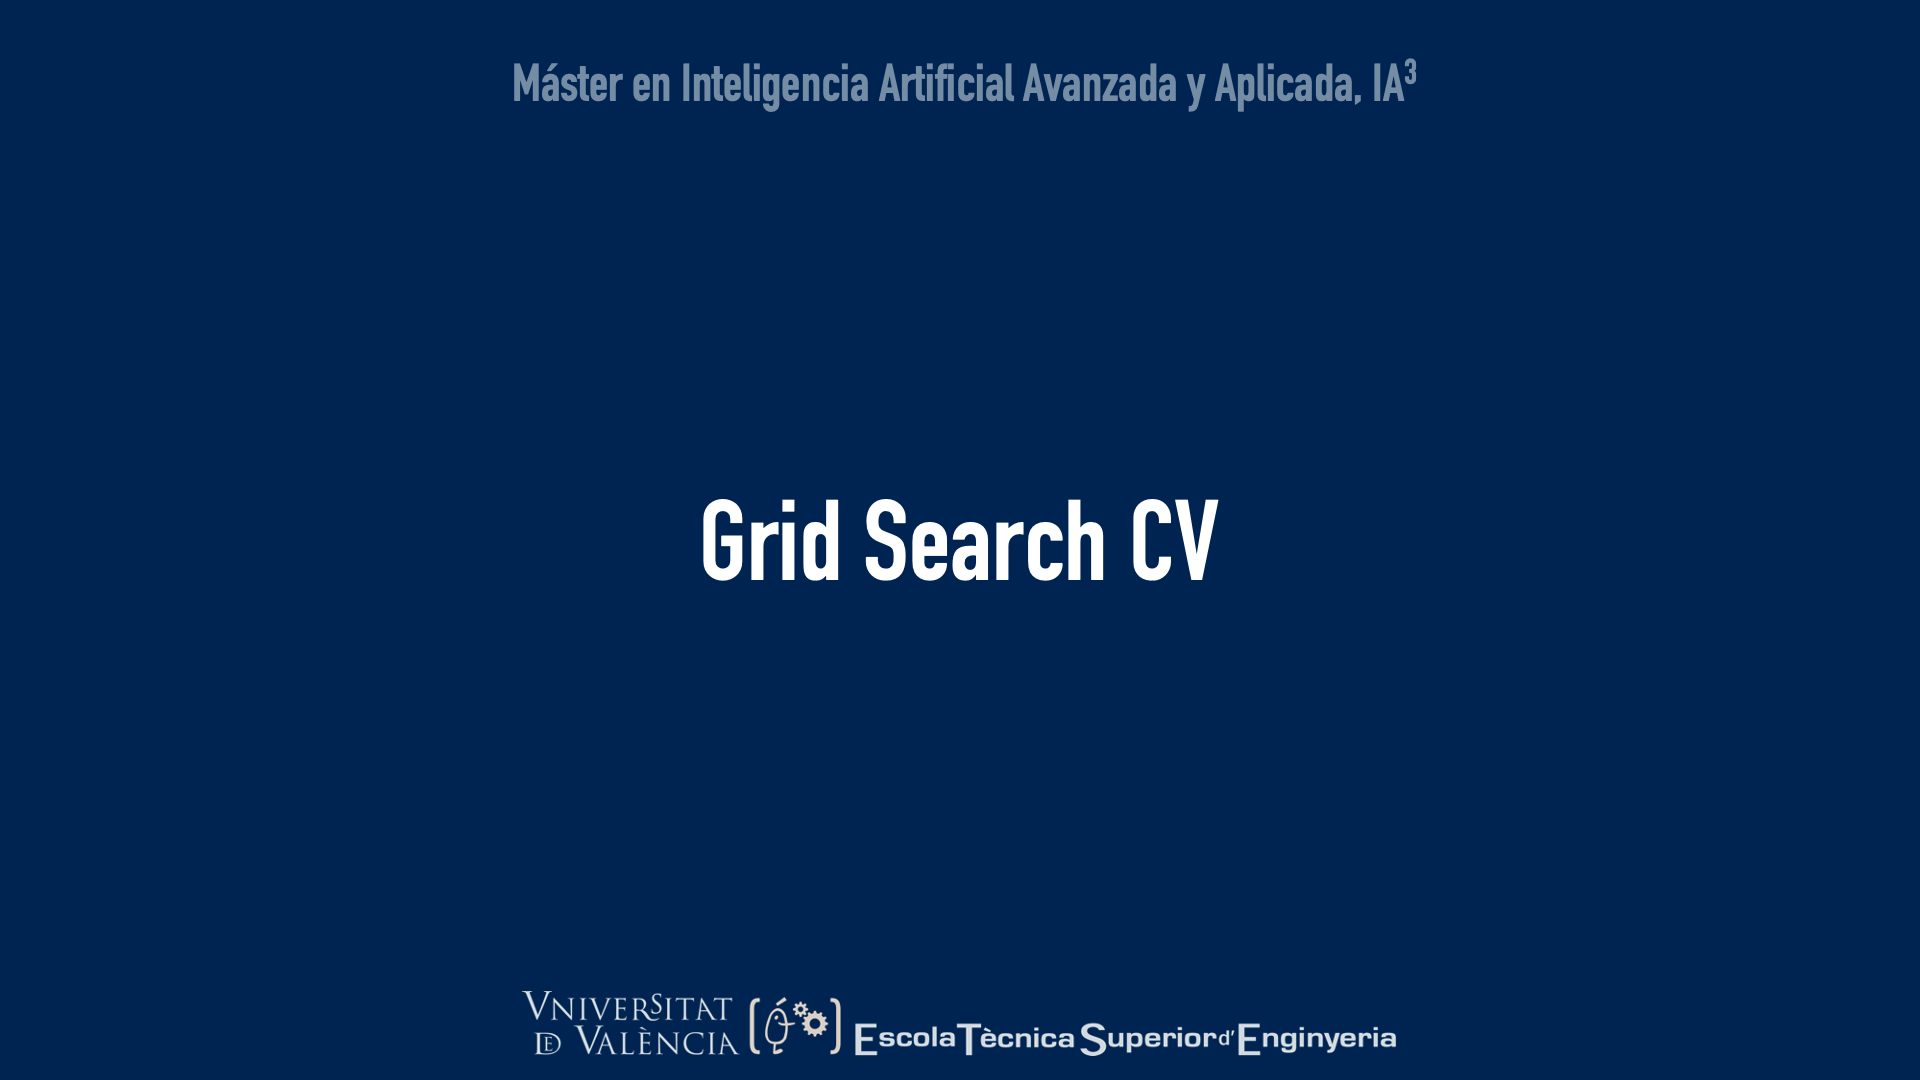

Terminemos el área de ML hablando de dos conceptos cruciales para entrenar con éxito nuestros modelos. Cross Validation y Grid Search.

Grid Search hace referencia a una búsqueda en rejilla sobre diferentes hiperparámetros. En esencia viene a ser un bucle for que recorre todos los conjuntos de hiperparámetros que podrían definirse. Por ejemplo si planteamos una búsqueda en rejilla para los hiperparámetros max_depth y min_samples_split obtendríamos los siguientes puntos.

In [227]:
from itertools import product
import plotly.express as px
max_depth = [4, 5, 6] 
min_samples = [1, 10, 20, 30]
args = list(product(max_depth, min_samples))
df_args = pd.DataFrame(args)
df_args.columns = ['max_depth', 'min_samples']
fig = px.scatter(df_args, x='max_depth', y='min_samples')
fig.show()

Cada uno de los puntos representados en esa gráfica es un modelo que será entrenado en nuestro grid search. Por supuesto, podéis plantear rejillas en 3 o más dimensiones que cubran más hiperparámetros.

Cross-Validation hace referencia a una técnica en la que se utiliza el mismo dataset para entrenar y validar vuestro algoritmo. En esencia se divide el dataset en diferentes partes, en cada iteración del cross-validation se utiliza un subconjunto para entrenar y se valida en los restantes. La evaluación final será la media de todos los scores obtenidos durante el cross-validation.

<br>
<br>

<center>

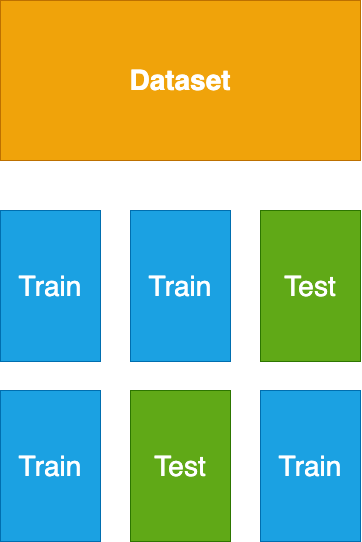

</center>

In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import sklearn

In [229]:
param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 15]}
model = DecisionTreeClassifier()
cv = GridSearchCV(model, param_grid, scoring="f1_micro", cv=10)

In [230]:
cv.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 20],
                         '

In [231]:
cv.cv_results_

{'mean_fit_time': array([0.00213838, 0.00209596, 0.00205076, 0.00204136, 0.00202229,
        0.002034  , 0.0020438 , 0.00203035, 0.00202093]),
 'mean_score_time': array([0.00153465, 0.00153308, 0.00174146, 0.00148742, 0.00152304,
        0.00148158, 0.00146949, 0.00152626, 0.001618  ]),
 'mean_test_score': array([0.85516667, 0.83933333, 0.83933333, 0.86716667, 0.84733333,
        0.84333333, 0.84716667, 0.84333333, 0.83933333]),
 'param_max_depth': masked_array(data=[5, 5, 5, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[5, 10, 15, 5, 10, 15, 5, 10, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'min_samples_split': 5},
  {'max_depth': 5, 'min_samples_split': 10},
  

In [233]:
cv.best_estimator_ #para acceder al mejor  modelo que haya habido en el crossvalidation

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')